Mounted at /content/gdrive
()
('There are', 9, 'Metagenomes:')
('   ', ['VC1', 'VC2', 'VC3', 'VC4', 'VC5', 'VC6', 'PRI', 'ASB', 'ANR'])
('VC1', [0.0, 0.24821107918018895, 0.2176931623107842, 0.21121799924124207, 0.3836159600252543, 0.24746472663139324, 0.7183052759411569, 0.7389032022561566, 0.5835116294447432])
('VC2', [0.24821107918018895, 0.0, 0.10650551969155769, 0.15469664415350526, 0.204982796640189, 0.12469311039726924, 0.734776445727299, 0.6995839546389176, 0.6222841990473217])
('VC3', [0.2176931623107842, 0.10650551969155769, 0.0, 0.15118388031954566, 0.23405265724787594, 0.12436446977390715, 0.7326208798263529, 0.7027981560319443, 0.6160789929282345])
('VC4', [0.21121799924124207, 0.15469664415350526, 0.15118388031954566, 0.0, 0.28192408938216845, 0.14532359383497725, 0.7342546559871184, 0.7139186877224557, 0.6026341340455691])
('VC5', [0.3836159600252543, 0.204982796640189, 0.23405265724787594, 0.28192408938216845, 0.0, 0.23634235954656624, 0.7551080871711575, 0.680202739388

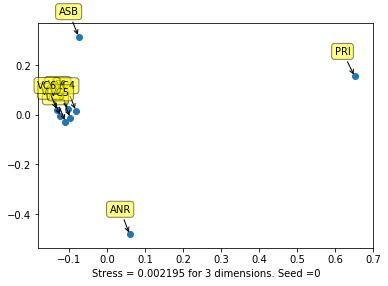

In [1]:
"""Multidimensional scaling program from: 
http://baoilleach.blogspot.com/2014/01/convert-distance-matrix-to-2d.html
"""
num_process = 410
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
 
max_iterations = 1000
epsilon = 0.0001
initials = 1000 
dimensions = 3
seed = 0

"""
# Distance file available from RMDS project:
#    https://github.com/cheind/rmds/blob/master/examples/european_city_distances.csv
reader = csv.reader(open("european_city_distances.csv", "r"), delimiter=';')
data = list(reader)
"""
from google.colab import drive
drive.mount('/content/gdrive')
inputfile = '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/VC.Plus.3.Joined.BC.Matrix.csv' 
reader = csv.reader(open(inputfile, "r"), delimiter=',')
data = list(reader)
bcs = []
mgs = []
for d in data:
    mgs.append(d[0])
    bcs.append(map(float , d[1:]))
print()
print("There are", len(mgs), "Metagenomes:")
print('   ', mgs)
for x in range(0, len(bcs)):
    print(mgs[x], bcs[x])

adist = np.array(bcs)
amax = np.amax(adist)
adist /= amax

#seed = np.random.RandomState(seed=3)
mds = manifold.MDS(metric=False, dissimilarity="precomputed", max_iter= max_iterations, \
                    eps= epsilon, n_init= initials, n_components= dimensions, random_state= seed)
#mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
#mds = manifold.MDS(n_components=2, metric=False, dissimilarity="precomputed", random_state=6)

results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
#plt.title('Number of Components = ' +str(mds.n_components))
plt.xlabel('Stress = ' +str(mds.stress_)[:8] + ' for ' +str(mds.n_components) + ' dimensions. Seed =' +str(seed))


for label, x, y in zip(mgs, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
print('Stress =',str(mds.stress_), 'for', dimensions, 'dimensions. Seed =', seed)
plt.show()
#For VC only:    ('Stress =', '0.0006617519611374526', 'for', 3, 'dimensions. Seed =', 0)
#For VC + altri: ('Stress =', '0.0021954170117589873', 'for', 3, 'dimensions. Seed =', 0)
